<a href="https://colab.research.google.com/github/Mahe243/CODSOFT_TASK3/blob/main/SALES_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score





In [ ]:
#Load the dataset
advertising_data = pd.read_csv("/content/advertising.csv")

In [ ]:
#Display the first five rows of the dataset
print(advertising_data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [ ]:
#Display the shape of the dataset (rows, columns)
print(advertising_data.shape)

(200, 4)


In [ ]:
# Display basic statistical information about the dataset
print(advertising_data.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


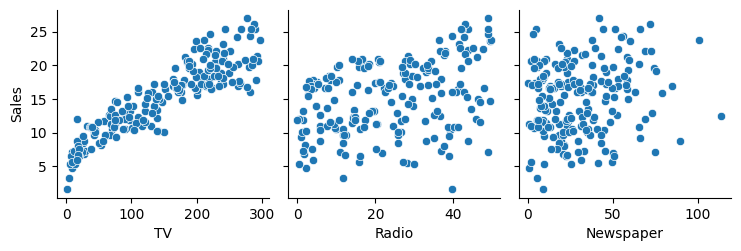

In [ ]:
# Visualize relationships between features and target using pairplot
sns.pairplot(advertising_data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='scatter')
plt.show()

In [ ]:
#Create histograms for each feature
features = ['TV', 'Radio', 'Newspaper']
colors = ['blue', 'green', 'purple']

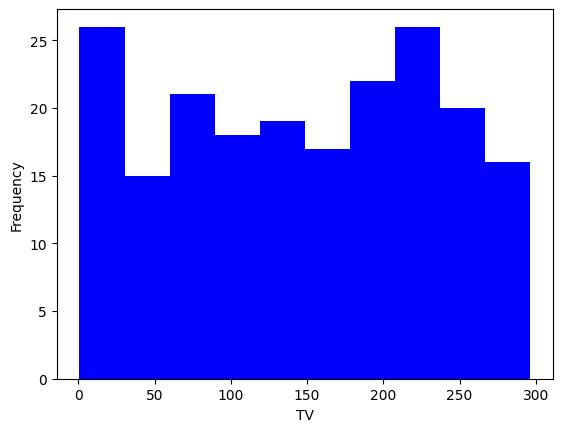

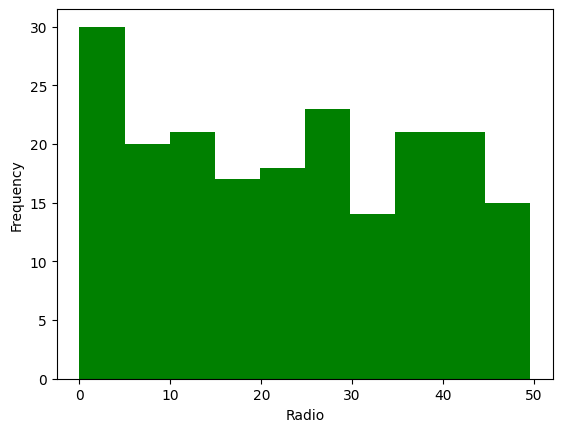

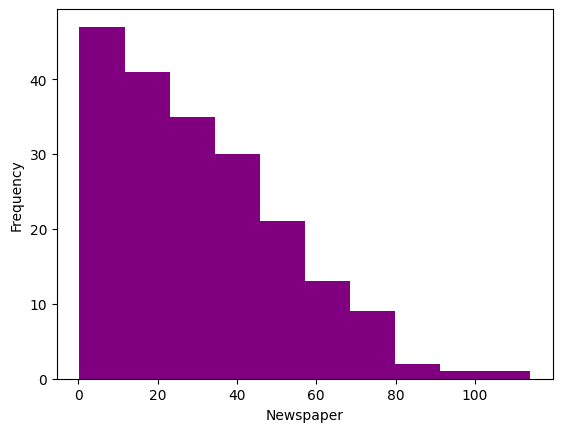

In [ ]:
for feature, color in zip(features, colors):
    advertising_data[feature].plot.hist(bins=10, color=color)
    plt.xlabel(feature)
    plt.show()

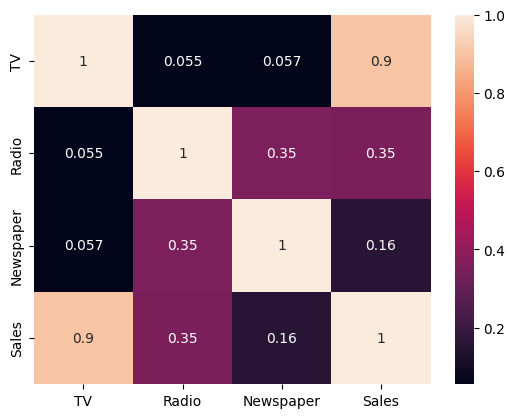

In [ ]:
#Create a heatmap to visualize the correlation matrix
correlation_matrix = advertising_data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(advertising_data[['TV', 'Radio', 'Newspaper']], advertising_data['Sales'], test_size=0.3, random_state=42)

In [ ]:
#Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Predict sales on the test set
y_pred = model.predict(X_test)

In [ ]:
#Print the coefficients and intercept of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [0.05358869 0.10270677 0.00793167]
Intercept: 4.743766701589685


In [ ]:
# alculate and print the Mean Squared Error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2.541624036229147
R-squared: 0.9091484341849799


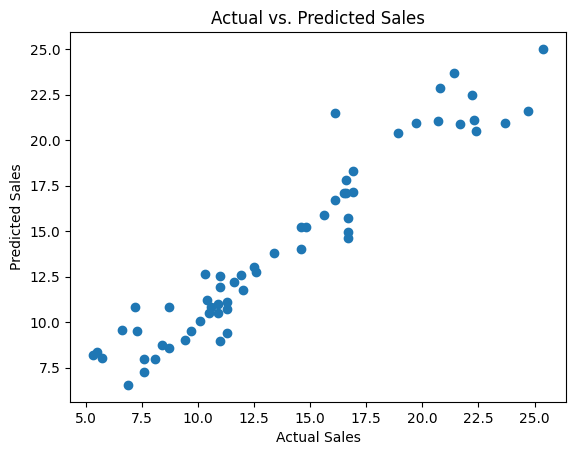

In [ ]:
#Visualize the predicted vs. actual sales on the test set
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.show()

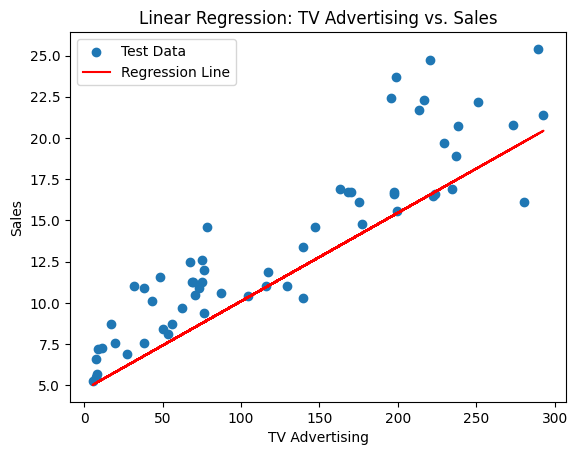

In [ ]:
#Plot the regression line along with the test set data points
plt.scatter(X_test['TV'], y_test, label='Test Data')
plt.plot(X_test['TV'], model.coef_[0] * X_test['TV'] + model.intercept_, color='red', label='Regression Line')
plt.xlabel('TV Advertising')
plt.ylabel('Sales')
plt.title('Linear Regression: TV Advertising vs. Sales')
plt.legend()
plt.show()

